In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
project_dir = 'C:\\Users\\PLDD\\python\\Python\\ML\\Kaggle\\house_price'
raw_path = os.path.join(project_dir,'data','raw')
train_path = os.path.join(raw_path, 'train.csv')
test_path = os.path.join(raw_path, 'test.csv')

In [21]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
sns.set()

In [ ]:
def ProccessOutliers(df):
#'LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea', 'SalePrice']
#copydf['LotFrontage'].plot.hist()
#copydf['LotFrontage'].plot.box()
#copydf['LotArea'].plot.hist()
#copydf['LotArea'].plot.box()
#copydf['GrLivArea'].plot.hist()
#copydf['GrLivArea'].plot.box()
#plt.show()
    lx = (df['SalePrice'] <= 200000) & (df['GrLivArea'] >= 4000) # drop from train set
    lx = df['LotFrontage'] > 300 # drop from train set
    lx = (df['LotFrontage'] > 200) | (df['LotArea'] > 100000) | (df['GrLivArea'] > 4000)
#df = df.drop(df.index[lx], axis = 0)
    df.loc[df['LotFrontage'] > 200,'LotFrontage'] = np.nan
    df.loc[df['LotArea'] > 100000,'LotArea'] = np.nan
    df.loc[df['GrLivArea'] > 4000,'GrLivArea'] = np.nan
    return df

In [47]:
columns = ['LotFrontage', 'LotArea', 'OverallQual','OverallCond', 'MasVnrArea', 
          'BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
columns = [ 'LotArea','TotalBsmtSF','GrLivArea','GarageArea','SalePrice','BsmtFinSF1','BsmtFinSF2','MasVnrType', 'MasVnrArea']
#df = train[columns].astype('float')
#sns.pairplot(df)
#df.isnull().any()
#df.corr()

In [63]:
#sns.pairplot(data = df, dropna = True)
#lx = train['MasVnrType'] == 'None'
#sns.distplot(train[~lx]['MasVnrArea'])
#train['MasVnrType'].
train['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [65]:
df = train[['SalePrice', 'GrLivArea', 'GarageArea','LotArea','LotFrontage', 'YearBuilt','Neighborhood','LotShape','LandContour','LotConfig']]
#lx = (df['SalePrice'] <= 200000) & (df['GrLivArea'] >= 4000)
lx = train['LotFrontage'] > 300
df[lx]
#sns.lmplot(x='GrLivArea', y='SalePrice',data = df[~lx])

,SalePrice,GrLivArea,GarageArea,LotArea,LotFrontage,YearBuilt,Neighborhood,LotShape,LandContour,LotConfig
934,242000,2069,505,27650,313.0,1960,NAmes,IR2,HLS,Inside
1298,160000,5642,1418,63887,313.0,2008,Edwards,IR3,Bnk,Corner


In [14]:
df=train.select_dtypes(include=[np.number])
df.columns
train.columns[train.isnull().any(0)]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

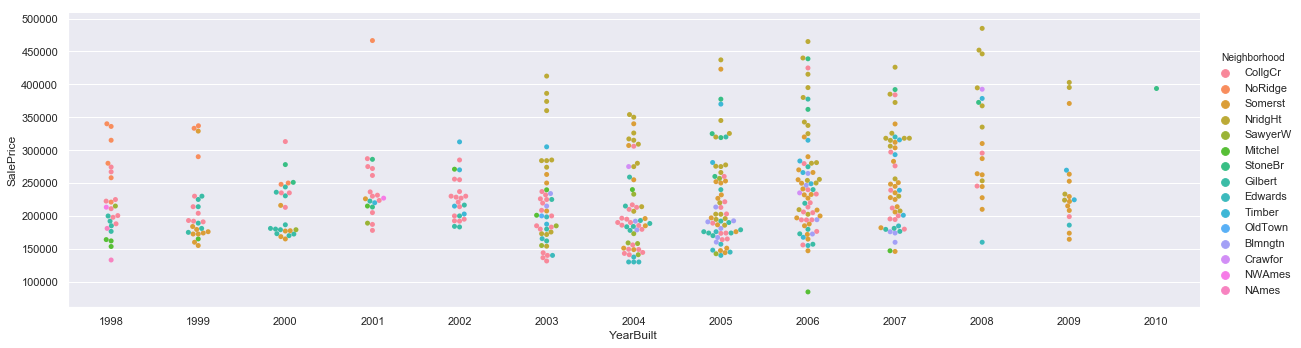

In [71]:

#train_df.columns 'LotFrontage', 'LotArea'
df = train[['SalePrice','Neighborhood','YearBuilt']]
lx = (df['YearBuilt'] > 1997) & (df['SalePrice'] < 500000)
sns.catplot(x = 'YearBuilt',hue = 'Neighborhood', y = 'SalePrice',data = df[lx],kind="swarm",aspect = 3.4)
# scatter plot matrix
#columns = ['GrLivArea','SalePrice']
#pd.plotting.scatter_matrix(train_df[columns],figsize=(10,10))
#plt.figure()
#train_df[columns].corr()

In [99]:
df = test.copy()
df['SalePrice'] = 0.0
df = df.append(train)
print(df.columns[df.isnull().any()])
col = ['Alley']
col1 = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
col2 = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
df['BsmtFullBath'].unique()
lx = df[col1].isnull().any(axis=1)
lx2 = df['TotalBsmtSF'] == 0
lx3 = ~df[lx2][col1].isnull().all(axis=1)

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType'],
      dtype='object')


0

In [12]:
print(train_df['MSZoning'].unique())
print(test_df['MSZoning'].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['RH' 'RL' 'RM' 'FV' 'C (all)' nan]


In [4]:
numberic_features=train_df.select_dtypes(include=[np.number])
categorical_features=train_df.select_dtypes(include=[np.object])

In [7]:
numberic_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

In [ ]:
lx = test_df['Utilities'] == 'AllPub'
print(lx.sum())
print(lx.size)

 # Create data frame

Combines train and test data frame:

In [ ]:
def CreateDataFrame(train_path, test_path):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    test_df['SalePrice'] = 0.0
    df = train_df.append(test_df)
    df.index = list(range(train_df.index.size + test_df.index.size))
    # 2916 out of 2919 Utilities are AllPub so i think it should be droped off
    df = df.drop('Utilities', axis = 1)
    return df

# Proccess outliers

In [ ]:
def ProccessOutliers(df):
#'LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'PoolArea', 'SalePrice']
#copydf['LotFrontage'].plot.hist()
#copydf['LotFrontage'].plot.box()
#copydf['LotArea'].plot.hist()
#copydf['LotArea'].plot.box()
#copydf['GrLivArea'].plot.hist()
#copydf['GrLivArea'].plot.box()
#plt.show()
    lx = (df['LotFrontage'] > 200) | (df['LotArea'] > 100000) | (df['GrLivArea'] > 4000)
#df = df.drop(df.index[lx], axis = 0)
    df.loc[df['LotFrontage'] > 200,'LotFrontage'] = np.nan
    df.loc[df['LotArea'] > 100000,'LotArea'] = np.nan
    df.loc[df['GrLivArea'] > 4000,'GrLivArea'] = np.nan
    return df

# Proccess Nan values

In [ ]:
def ReplaceNanValues_LotFrontageArea(df, alables, abins, fromfld, tofld, catclass, targetclass):
    fullclass = catclass + [targetclass]
    df[tofld]=pd.cut(x = df[fromfld].values, bins = abins, right = False, labels = alables)
    validdf = df[fullclass].dropna(axis = 0, how = 'any')
    nandf = df[df[targetclass].isnull()]
    pvt = validdf.pivot_table(values = targetclass, index = catclass, aggfunc = np.median)
    pvt=pvt[pvt.notnull().all(1)]
    t1 = pvt.loc[[tuple(x) for x in nandf[catclass].values]]
    t1.index = nandf.index
    df.loc[nandf.index,targetclass] = t1[targetclass]
    df = df.drop(tofld, axis = 1)
    return df

def ProccessNanValues(df):
    DefSeqCat = ['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                 'Fence', 'MiscFeature']
    UndefSeqCat1 = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd','Electrical', 'KitchenQual',
                    'Functional', 'SaleType'] # there are defenetly lost elements 
    UndefSeqCat2 = ['MasVnrType'] # i may just not make it clear the property of the column
    UndefSeqNum = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                   'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']

    replace=dict.fromkeys(DefSeqCat, 'None')
    df = df.fillna(replace)
#'MasVnrType'
    ix = df.index[df['MasVnrType'].isnull()]
    df.loc[ix,'MasVnrType'] = 'None'
    df.loc[ix,'MasVnrArea'] = 0

    NanCol = ['LotFrontage', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
              'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
              'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SaleType']
    #Replace NAN values in 'LotFrontage' and 'LotArea' with iterpolated value.
    yearlable = ['1906', '1942', '1975', '1991', '2011']
    yearbin = [1800,1906,1942,1975, 1991, 2011]

#case 1
    catclass = ['Neighborhood', 'LotConfig','LotShape','YearInt']
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotFrontage' )
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotArea')
    #print(df[df['LotFrontage'].isnull()].index.size)

    catclass = ['LotConfig','LotShape','YearInt']
#case 2
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotFrontage')
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotArea')
    #print(df[df['LotFrontage'].isnull()].index.size)

#case 3
    yearlable = ['1942', '1991', '2011']
    yearbin = [1800, 1942, 1991, 2011]
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotFrontage')
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotArea')
    #print(df[df['LotFrontage'].isnull()].index.size)

#case 4
    yearlable = ['1975', '1991', '2011']
    yearbin = [1800, 1975, 1991, 2011]
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotFrontage')
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotArea')
    #print(df[df['LotFrontage'].isnull()].index.size)

#case 5
    yearlable = ['2011']
    yearbin = [1800, 2011]
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotFrontage')
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotArea')
    #print(df[df['LotFrontage'].isnull()].index.size)
    #print(df[df['LotArea'].isnull()].index.size)
    
    #Replace Nan in 'MSZoning'
    ind1 = [1915, 2216, 2250] # C - assign by many factors
    ind2 = [2904] # RL - by Lot Area, LotFrontage and YearBuilt 
    df.loc[ind1,'MSZoning'] = 'C'
    df.loc[ind2,'MSZoning'] = 'RL'
    
    #Replace Nan in 'Exterior1st' and 'Exterior2nd'
    targetclass = ['Exterior1st', 'Exterior2nd']
    ind = [2151]
    df.loc[ind,targetclass] = 'AsbShng'
    
    #Add column 'RangeYrBlt' and remove columns 'GarageYrBlt' and 'YearBilt'
    yearbins = [1800, 1895, 1905, 1917, 1927, 1937,1947,1960, 1973, 1989, 1998, 2012]
    yearlabels = ['1895', '1905', '1917', '1927', '1937', '1947', '1960', '1973', '1989', '1998', '2012']
    if df.columns.isin(['YearBuilt']).any():
        df['RangeYrBlt']=pd.cut(x = df['YearBuilt'].values, bins = yearbins, right = False, labels = yearlabels)
        df = df.drop('YearBuilt', axis = 1)
    if df.columns.isin(['GarageYrBlt']).any():
        df = df.drop('GarageYrBlt', axis = 1)
    
    #Replace Nan in 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF' (row index - 2120)
    # There is no basement in this house so all areas we take as 0
    df.loc[2120,['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = 0
    
    #Replase Nan in 'Electrical' (row index - 1379)
    df.loc[1379, 'Electrical'] = 'SBrkr' #  all houses in 2012 year built have this type of Electrical
    
    #Replase Nan in 'GrLivArea'
    if df.columns.isin(['GrLivArea']).any():
        df = df.drop('GrLivArea', axis = 1) # it is sum of '1stFlrSF' and '2ndFlrSF'
        
    #Replace Nan in 'BsmtFullBath' and 'BsmtHalfBath' (row indexes are 2120 and 2188) # all these houses have no basements
    df.loc[[2120,2188],['BsmtFullBath', 'BsmtHalfBath']] = 0
    
    #Replace Nan in 'KitchenQual' (row index is 1555)
    # Value of 'KitchenQual' depends on 'OverallQual', 'OverallCond'
    df.loc[1555, 'KitchenQual'] = 'TA'
    
    #Replace Nan in 'Functional' (row indexes are 2216, 2473)
    # The most used functionality is 'Typ'
    df.loc[[2216, 2473],'Functional'] = 'Typ'
    
    #Replace Nan in 'GarageCars', 'GarageArea' (row index is 2576)
    #there is no garage so its area is 0
    df.loc[2576,'GarageArea'] = 0
    if df.columns.isin(['GarageCars']).any():
        df = df.drop('GarageCars', axis = 1) # it has straight dependency on garage area
        
    #Replace Nan in 'SaleType' (row index is 2489)
    df.loc[2489, 'SaleType'] = 'WD' # the most used type according to sold year and sale condition
    
    return df

# Categorizing

In [ ]:
def sorted_columns(df, what, bby):
    t_df = df.loc[df[bby] != 0]
    t_df = t_df.groupby([what]).agg({bby : 'median'})
    t_df = t_df.sort_values(by = bby, axis = 0 )
    return t_df.index.values

def Categorizing(copydf):

    OrderedCat = ['MSZoning', 'Street','Alley', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofMatl']
    NonOrderedCat = ['LandContour', 'LotConfig', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'RoofStyle'
                'Exterior1st','Exterior2nd']

    copydf['MSZoning'] = pd.Categorical(copydf['MSZoning'].values, ['C', 'C (all)', 'RM', 'RH', 'RL', 'FV'], ordered = True)
    copydf['Street'] = pd.Categorical(copydf['Street'].values, ['Grvl','Pave'], ordered = True)
    copydf['Alley'] = pd.Categorical(copydf['Alley'].values, ['None', 'Grvl', 'Pave'], ordered = True)
    copydf['LotShape'] = pd.Categorical(copydf['LotShape'].values, ['Reg', 'IR1', 'IR2', 'IR3'], ordered = True) # can be droped
    copydf['LandContour'] = pd.Categorical(copydf['LandContour'].values, ['Lvl', 'Bnk', 'Low', 'HLS'], ordered = True)
    copydf['LotConfig'] = pd.Categorical(copydf['LotConfig'].values, ['FR2', 'Corner', 'Inside', 'CulDSac', 'FR3'], ordered = True)
    copydf['LandSlope'] = pd.Categorical(copydf['LandSlope'].values, ['Sev', 'Mod', 'Gtl'], ordered = True)
    copydf['Neighborhood'] = pd.Categorical(copydf['Neighborhood'].values, sorted_columns(copydf.loc[copydf.SalePrice != 0], 'Neighborhood' , 'SalePrice'), ordered = True)
    copydf['Condition1'] = pd.Categorical(copydf['Condition1'].values, ['PosA', 'PosN', 'Norm', 'RRNn', 'RRNe', 'RRAe',  'RRAn', 'Feedr', 'Artery'], ordered = True)
    copydf['Condition2'] = pd.Categorical(copydf['Condition2'].values, ['PosA', 'PosN', 'Norm', 'RRNn', 'RRAe', 'RRAn','Feedr', 'Artery'], ordered = True)
    copydf['BldgType'] = pd.Categorical(copydf['BldgType'].values, ['2fmCon', 'Duplex', 'Twnhs', 'TwnhsE', '1Fam'], ordered = True)
    copydf['HouseStyle'] = pd.Categorical(copydf['HouseStyle'].values, ['1.5Unf', '1.5Fin', 'SFoyer', 'SLvl', '1Story', '2.5Unf', '2.5Fin', '2Story'], ordered = True)
    copydf['RoofStyle'] = pd.Categorical(copydf['RoofStyle'].values, sorted_columns(copydf.loc[copydf.SalePrice != 0], 'RoofStyle', 'SalePrice'), ordered = True)
    copydf['RoofMatl'] = pd.Categorical(copydf['RoofMatl'].values, ['Roll', 'ClyTile', 'Metal', 'CompShg', 'Tar&Grv', 'Membran', 'WdShake', 'WdShngl'], ordered = True)
    copydf['Exterior1st'] = pd.Categorical(copydf['Exterior1st'].values, sorted_columns(copydf.loc[copydf.SalePrice != 0], 'Exterior1st', 'SalePrice'), ordered = True)
    copydf['Exterior2nd'] = pd.Categorical(copydf['Exterior2nd'].values, sorted_columns(copydf.loc[copydf.SalePrice != 0], 'Exterior2nd', 'SalePrice'), ordered = True)
    copydf['MasVnrType'] = pd.Categorical(copydf['MasVnrType'].values, sorted_columns(copydf.loc[copydf.SalePrice != 0], 'MasVnrType', 'SalePrice'), ordered = True)
    copydf['ExterQual'] = pd.Categorical(copydf['ExterQual'].values, ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
    copydf['ExterCond'] = pd.Categorical(copydf['ExterCond'].values, ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
    copydf['Foundation'] = pd.Categorical(copydf['Foundation'].values, ['Slab', 'Stone', 'Wood', 'BrkTil', 'CBlock', 'PConc'], ordered = True)
    copydf['BsmtQual'] = pd.Categorical(copydf['BsmtQual'].values, ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
    copydf['BsmtCond'] = pd.Categorical(copydf['BsmtCond'].values, ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
    copydf['BsmtExposure'] = pd.Categorical(copydf['BsmtExposure'].values, ['None', 'No', 'Mn', 'Av', 'Gd'], ordered = True)
    copydf['BsmtFinType1'] = pd.Categorical(copydf['BsmtFinType1'].values, ['None', 'LwQ', 'Rec','Unf','BLQ','ALQ','GLQ'], ordered = True)
    copydf['BsmtFinType2'] = pd.Categorical(copydf['BsmtFinType2'].values, ['None', 'LwQ', 'Rec','Unf','BLQ','ALQ','GLQ'], ordered = True)
    copydf['Heating'] = pd.Categorical(copydf['Heating'].values, ['Floor', 'Grav', 'Wall', 'OthW', 'GasW','GasA'], ordered = True)
    copydf['HeatingQC'] = pd.Categorical(copydf['HeatingQC'].values, ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
    copydf['CentralAir'] = pd.Categorical(copydf['CentralAir'].values, ['N', 'Y'], ordered = True)
    copydf['Electrical'] = pd.Categorical(copydf['Electrical'].values, ['Mix', 'FuseP', 'FuseF', 'FuseA', 'SBrkr' ], ordered = True)
    copydf['KitchenQual'] = pd.Categorical(copydf['KitchenQual'].values, ['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
    copydf['Functional'] = pd.Categorical(copydf['Functional'].values, ['Sev', 'Maj2', 'Maj1', 'Min1', 'Min2', 'Mod', 'Typ'], ordered = True)
    copydf['FireplaceQu'] = pd.Categorical(copydf['FireplaceQu'].values, ['None','Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
    copydf['GarageType'] = pd.Categorical(copydf['GarageType'].values, ['None', 'CarPort','Detchd', '2Types', 'Basment', 'Attchd', 'BuiltIn'], ordered = True)
    copydf['GarageFinish'] = pd.Categorical(copydf['GarageFinish'].values, ['None', 'Unf', 'RFn', 'Fin'], ordered = True)
    copydf['GarageQual'] = pd.Categorical(copydf['GarageQual'].values, ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
    copydf['GarageCond'] = pd.Categorical(copydf['GarageCond'].values, ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
    copydf['PavedDrive'] = pd.Categorical(copydf['PavedDrive'].values, ['N', 'P', 'Y'], ordered = True)

    copydf['PoolQC'] = pd.Categorical(copydf['PoolQC'].values, ['None', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)
    copydf['Fence'] = pd.Categorical(copydf['Fence'].values, ['MnWw', 'GdWo', 'MnPrv', 'GdPrv', 'None'], ordered = True)
    copydf['MiscFeature'] = pd.Categorical(copydf['MiscFeature'].values, ['Othr', 'Shed', 'Gar2', 'None', 'TenC'], ordered = True)
    copydf['SaleType'] = pd.Categorical(copydf['SaleType'].values, ['Oth', 'ConLD', 'ConLw', 'COD', 'WD', 'ConLI', 'CWD', 'Con', 'New'], ordered = True)
    copydf['SaleCondition'] = pd.Categorical(copydf['SaleCondition'].values, ['AdjLand', 'Abnorml', 'Family', 'Alloca', 'Normal', 'Partial'], ordered = True)

    #print(copydf.columns[copydf.dtypes == 'object'].size)
    return copydf

In [ ]:
def FormatAndSave(df):
    dff = df.copy()
    categorical_flds = dff.columns[dff.dtypes == 'category'].values
    dff = pd.get_dummies(dff, columns = categorical_flds)
    
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    
    # train data
    dff.loc[dff.SalePrice != 0].to_csv(write_train_path) 
    # test data
    columns = [column for column in dff.columns if column != 'SalePrice']
    dff.loc[dff.SalePrice == 0, columns].to_csv(write_test_path) 

In [ ]:
df = CreateDataFrame(train_path, test_path)
df = df.pipe(ProccessOutliers).pipe(ProccessNanValues).pipe(Categorizing).pipe(FormatAndSave)

# Insert implementation into script file

In [ ]:
get_processed_data_script_file = os.path.join(os.path.pardir,'src','data','get_processed_data.py')

In [ ]:
%%writefile $get_processed_data_script_file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def CreateDataFrame():
    project_dir = 'C:\\Users\\PLDD\\python\\Python\\ML\\Kaggle\\house_price'
    raw_path = os.path.join(project_dir,'data','raw')
    train_path = os.path.join(raw_path, 'train.csv')
    test_path = os.path.join(raw_path, 'test.csv')
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)
    test_df['SalePrice'] = 0.0
    df = train_df.append(test_df)
    df.index = list(range(train_df.index.size + test_df.index.size))
    df = df.drop('Utilities', axis = 1)
    return df

def ProccessOutliers(df):
    lx = (df['LotFrontage'] > 200) | (df['LotArea'] > 100000) | (df['GrLivArea'] > 4000)
    df.loc[df['LotFrontage'] > 200,'LotFrontage'] = np.nan
    df.loc[df['LotArea'] > 100000,'LotArea'] = np.nan
    df.loc[df['GrLivArea'] > 4000,'GrLivArea'] = np.nan
    return df

def ReplaceNanValues_LotFrontageArea(df, alables, abins, fromfld, tofld, catclass, targetclass):
    fullclass = catclass + [targetclass]
    df[tofld]=pd.cut(x = df[fromfld].values, bins = abins, right = False, labels = alables)
    validdf = df[fullclass].dropna(axis = 0, how = 'any')
    nandf = df[df[targetclass].isnull()]
    pvt = validdf.pivot_table(values = targetclass, index = catclass, aggfunc = np.median)
    pvt=pvt[pvt.notnull().all(1)]
    t1 = pvt.loc[[tuple(x) for x in nandf[catclass].values]]
    t1.index = nandf.index
    df.loc[nandf.index,targetclass] = t1[targetclass]
    df = df.drop(tofld, axis = 1)
    return df

def ProccessNanValues(df):
    DefSeqCat = ['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
                 'Fence', 'MiscFeature']
    UndefSeqCat1 = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd','Electrical', 'KitchenQual',
                    'Functional', 'SaleType'] # there are defenetly lost elements 
    UndefSeqCat2 = ['MasVnrType'] # i may just not make it clear the property of the column
    UndefSeqNum = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                   'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
    replace=dict.fromkeys(DefSeqCat, 'None')
    df = df.fillna(replace)
#'MasVnrType'
    ix = df.index[df['MasVnrType'].isnull()]
    df.loc[ix,'MasVnrType'] = 'None'
    df.loc[ix,'MasVnrArea'] = 0
    NanCol = ['LotFrontage', 'MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
              'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
              'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SaleType']
    #Replace NAN values in 'LotFrontage' and 'LotArea' with iterpolated value.
    yearlable = ['1906', '1942', '1975', '1991', '2011']
    yearbin = [1800,1906,1942,1975, 1991, 2011]
#case 1
    catclass = ['Neighborhood', 'LotConfig','LotShape','YearInt']
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotFrontage' )
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotArea')
    #print(df[df['LotFrontage'].isnull()].index.size)
    catclass = ['LotConfig','LotShape','YearInt']
#case 2
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotFrontage')
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotArea')
    #print(df[df['LotFrontage'].isnull()].index.size)
#case 3
    yearlable = ['1942', '1991', '2011']
    yearbin = [1800, 1942, 1991, 2011]
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotFrontage')
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotArea')
    #print(df[df['LotFrontage'].isnull()].index.size)
#case 4
    yearlable = ['1975', '1991', '2011']
    yearbin = [1800, 1975, 1991, 2011]
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotFrontage')
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotArea')
    #print(df[df['LotFrontage'].isnull()].index.size)
#case 5
    yearlable = ['2011']
    yearbin = [1800, 2011]
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotFrontage')
    df = ReplaceNanValues_LotFrontageArea(df, yearlable, yearbin, 'YearBuilt', 'YearInt', catclass, 'LotArea')   
#Replace Nan in 'MSZoning'
    ind1 = [1915, 2216, 2250] # C - assign by many factors
    ind2 = [2904] # RL - by Lot Area, LotFrontage and YearBuilt 
    df.loc[ind1,'MSZoning'] = 'C'
    df.loc[ind2,'MSZoning'] = 'RL'    
#Replace Nan in 'Exterior1st' and 'Exterior2nd'
    targetclass = ['Exterior1st', 'Exterior2nd']
    ind = [2151]
    df.loc[ind,targetclass] = 'AsbShng'  
#Add column 'RangeYrBlt' and remove columns 'GarageYrBlt' and 'YearBilt'
    yearbins = [1800, 1895, 1905, 1917, 1927, 1937,1947,1960, 1973, 1989, 1998, 2012]
    yearlabels = ['1895', '1905', '1917', '1927', '1937', '1947', '1960', '1973', '1989', '1998', '2012']
    if df.columns.isin(['YearBuilt']).any():
        df['RangeYrBlt']=pd.cut(x = df['YearBuilt'].values, bins = yearbins, right = False, labels = yearlabels)
        df = df.drop('YearBuilt', axis = 1)
    if df.columns.isin(['GarageYrBlt']).any():
        df = df.drop('GarageYrBlt', axis = 1)
    df.loc[2120,['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = 0
    df.loc[1379, 'Electrical'] = 'SBrkr' #  all houses in 2012 year built have this type of Electrical
    if df.columns.isin(['GrLivArea']).any():
        df = df.drop('GrLivArea', axis = 1) # it is sum of '1stFlrSF' and '2ndFlrSF'
    df.loc[[2120,2188],['BsmtFullBath', 'BsmtHalfBath']] = 0
    df.loc[1555, 'KitchenQual'] = 'TA'
    df.loc[[2216, 2473],'Functional'] = 'Typ'
    df.loc[2576,'GarageArea'] = 0
    if df.columns.isin(['GarageCars']).any():
        df = df.drop('GarageCars', axis = 1) # it has straight dependency on garage area
    df.loc[2489, 'SaleType'] = 'WD' # the most used type according to sold year and sale condition
    return df

def sorted_columns(df, what, bby):
    t_df = df.loc[df[bby] != 0]
    t_df = t_df.groupby([what]).agg({bby : 'median'})
    t_df = t_df.sort_values(by = bby, axis = 0 )
    return t_df.index.values

def FormatAndSave(df):
    dff = df.copy()
    categorical_flds = dff.columns[dff.dtypes == 'category' ].values
    dff = pd.get_dummies(dff)#, columns = categorical_flds)
    processed_data_path = os.path.join(os.path.pardir,'data','processed')
    write_train_path = os.path.join(processed_data_path, 'train.csv')
    write_test_path = os.path.join(processed_data_path, 'test.csv')
    dff.loc[dff.SalePrice != 0].to_csv(write_train_path) 
    columns = [column for column in dff.columns if column != 'SalePrice']
    dff.loc[dff.SalePrice == 0, columns].to_csv(write_test_path) 

if __name__ == '__main__':
    df = CreateDataFrame()
    df = df.pipe(ProccessOutliers).pipe(ProccessNanValues).pipe(FormatAndSave)

In [ ]:
!python $get_processed_data_script_file

In [ ]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
write_train_path = os.path.join(processed_data_path, 'train.csv')
write_test_path = os.path.join(processed_data_path, 'test.csv')
train_df = pd.read_csv(write_train_path)

#  Build model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge

In [ ]:
processed_data_path = os.path.join(os.path.pardir,'data','processed')
train_path = os.path.join(processed_data_path, 'train.csv')
test_path = os.path.join(processed_data_path, 'test.csv')
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
def linear_ml_solve(train_df, test_df, scaler, solver, q = 0.4, target = 'temp.csv'):
    X = train_df.loc[:,train_df.columns != 'SalePrice'].as_matrix().astype('float')
    y = train_df['SalePrice'].ravel()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=q, random_state=0)
    X_train = scaler.fit_transform(X_train)
    if q != 0:
        X_test = scaler.transform(X_test)
        solver.fit(X_train, y_train)
        print(solver.score(X_test, y_test))
    else: 
        print("No test subsets!!!!")
    X = scaler.fit_transform(X)    
    XX = scaler.transform(test_df.as_matrix().astype('float'))
    solver.fit(X, y) 
    pred_y = solver.predict(XX).astype('int')
    df_submission = pd.DataFrame({'Id': test_df['Id'].values, 'SalePrice' : pred_y} )
    submission_data_path = os.path.join(os.path.pardir,'data','external')
    submission_file_path = os.path.join(submission_data_path, target)
    df_submission.to_csv(submission_file_path, index=False)

# Preprocessing Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

scaler1 = StandardScaler()
scaler2 = MinMaxScaler()
scaler3 = RobustScaler()
scaler4 = Normalizer()
scaler5 = QuantileTransformer()

# ML

In [ ]:
solver1 = linear_model.RidgeCV(alphas = np.arange(0.001, 5, 0.001))
solver2 = linear_model.LassoCV()
solver3 = linear_model.ElasticNetCV(alphas = np.arange(0.001, 5, 0.001), max_iter = 20000 )
solver4 = linear_model.BayesianRidge()
solver5 = KernelRidge(alpha=1.0,kernel='polynomial')
solver5_1 = GridSearchCV(KernelRidge(kernel='rbf', gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})
solver6 = linear_model.PassiveAggressiveRegressor(C = 10,tol = 0.00001, max_iter = 50000)
solver7 = linear_model.HuberRegressor(max_iter=10000)
solver8 = Pipeline([('poly', PolynomialFeatures(degree=2)),  ('linear', solver1)])

In [ ]:

linear_ml_solve(train_df, test_df, scaler5, solver5_1, 0.4,'03_KernelRidge_RBF.csv')